In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

In [58]:
device='cuda' if torch.cuda.is_available() else 'cpu'
print('A {} device was detected.'.format(device))


A cpu device was detected.


In [59]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
path='//content/drive/MyDrive/Colab Notebooks/Adsorption_Data.csv'
df=pd.read_csv(path)
df.head()

,C(x1),H(x2),N(x3),Si(x4),BET(x5),Adorption Capacity(output)
0,12.8,1.16,0.38,7.51,8.75,0.144
1,6.5,0.57,0.04,3.34,3.69,0.334
2,8.7,0.54,0.21,40.98,33.37,0.452
3,3.5,0.35,0.12,22.05,7.55,0.333
4,7.2,0.71,0.03,3.16,1.97,0.383


In [61]:
df.shape

(35, 6)

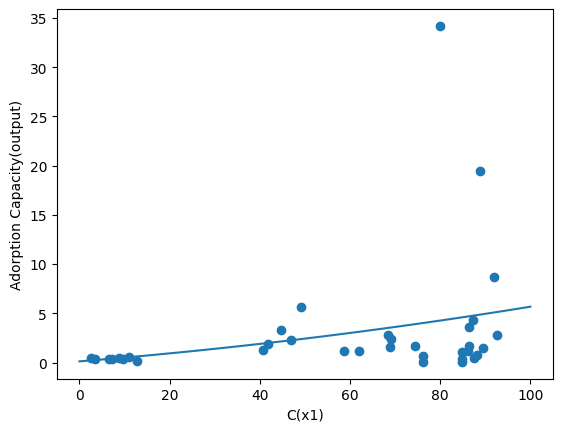

In [62]:


mymodel = numpy.poly1d(numpy.polyfit(df['C(x1)'], df['Adorption Capacity(output)'], 2))

myline = numpy.linspace(0, 100, 100)
plt.scatter(df['C(x1)'],df['Adorption Capacity(output)'])
plt.plot(myline,mymodel(myline))
plt.xlabel('C(x1)')
plt.ylabel('Adorption Capacity(output)')
plt.show()

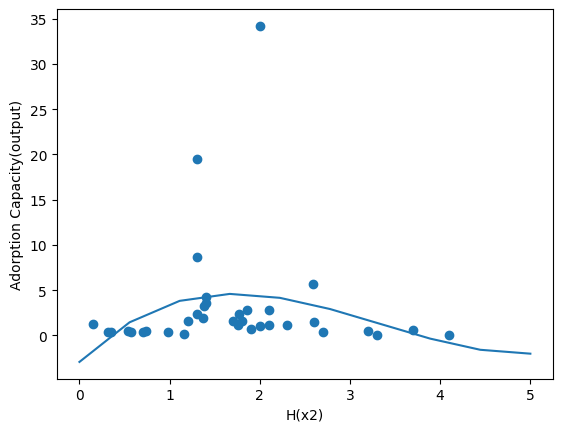

In [63]:
mymodel = numpy.poly1d(numpy.polyfit(df['H(x2)'],df['Adorption Capacity(output)'], 3))

myline = numpy.linspace(0, 5, 10)


plt.scatter(df['H(x2)'],df['Adorption Capacity(output)'])
plt.plot(myline,mymodel(myline))
plt.xlabel('H(x2)')
plt.ylabel('Adorption Capacity(output)')
plt.show()

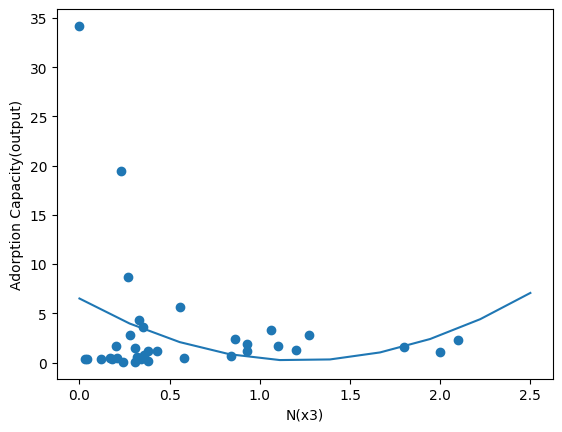

In [64]:
mymodel = numpy.poly1d(numpy.polyfit(df['N(x3)'],df['Adorption Capacity(output)'], 2))

myline = numpy.linspace(0, 2.5, 10)
plt.scatter(df['N(x3)'],df['Adorption Capacity(output)'])
plt.plot(myline,mymodel(myline))
plt.xlabel('N(x3)')
plt.ylabel('Adorption Capacity(output)')
plt.show()

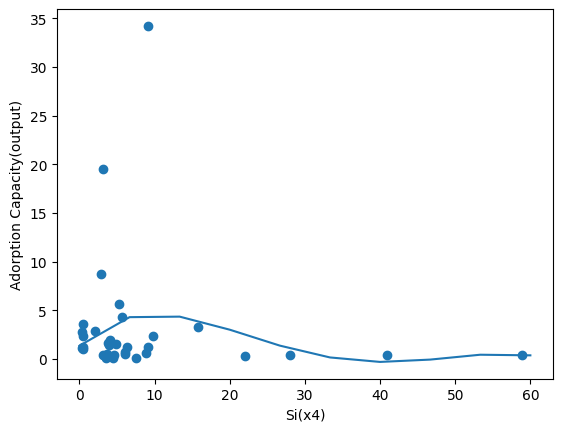

In [65]:
mymodel = numpy.poly1d(numpy.polyfit(df['Si(x4)'],df['Adorption Capacity(output)'], 4))

myline = numpy.linspace(0, 60, 10)

plt.scatter(df['Si(x4)'],df['Adorption Capacity(output)'])
plt.plot(myline,mymodel(myline))
plt.xlabel('Si(x4)')
plt.ylabel('Adorption Capacity(output)')
plt.show()

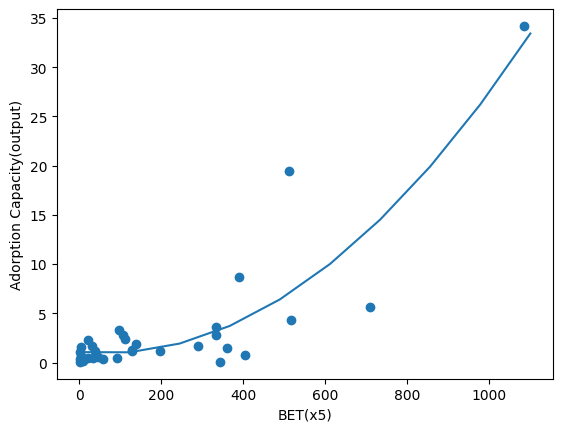

In [66]:
mymodel = numpy.poly1d(numpy.polyfit(df['BET(x5)'],df['Adorption Capacity(output)'], 2))

myline = numpy.linspace(0, 1100, 10)

plt.scatter(df['BET(x5)'],df['Adorption Capacity(output)'])
plt.plot(myline,mymodel(myline))
plt.xlabel('BET(x5)')
plt.ylabel('Adorption Capacity(output)')
plt.show()

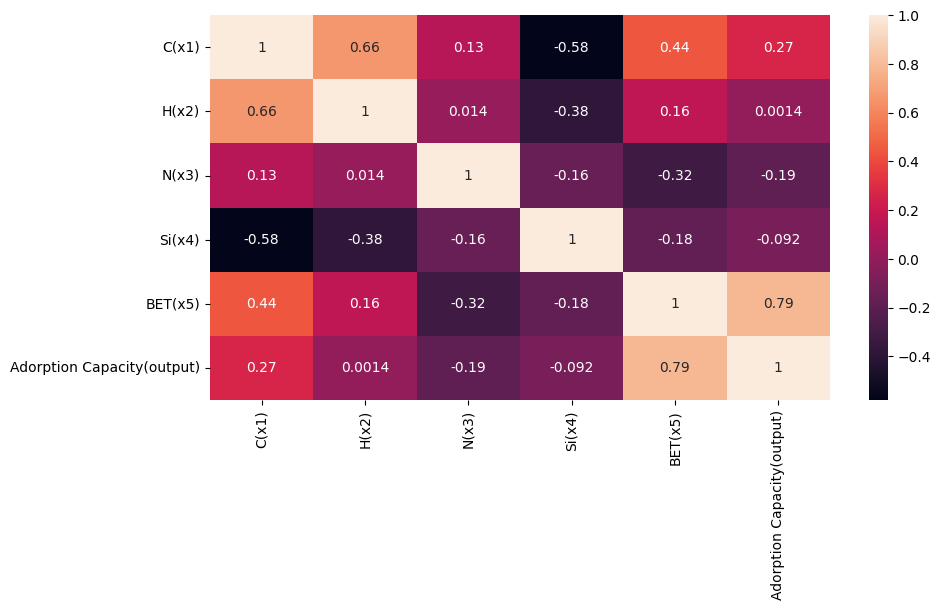

In [67]:
corr=df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True)
plt.show()

In [68]:
#Standardize the dataset


#Calculating the mean

x1mean=df['C(x1)'].mean()
x2mean=df['H(x2)'].mean()
x3mean=df['N(x3)'].mean()
x4mean=df['Si(x4)'].mean()
x5mean=df['BET(x5)'].mean()
outputmean=df['Adorption Capacity(output)'].mean()

#Calculating the standard deviation

x1std=df['C(x1)'].std()
x2std=df['H(x2)'].std()
x3std=df['N(x3)'].std()
x4std=df['Si(x4)'].std()
x5std=df['BET(x5)'].std()
outputstd=df['Adorption Capacity(output)'].std()

df['C(x1)']=(df['C(x1)']-x1mean)/x1std
df['H(x2)']=(df['H(x2)']-x2mean)/x2std
df['N(x3)']=(df['N(x3)']-x3mean)/x3std
df['Si(x4)']=(df['Si(x4)']-x4mean)/x4std
df['BET(x5)']=(df['BET(x5)']-x5mean)/x5std
df['Adorption Capacity(output)']=(df['Adorption Capacity(output)']-outputmean)/outputstd

df.head()

,C(x1),H(x2),N(x3),Si(x4),BET(x5),Adorption Capacity(output)
0,-1.444499,-0.572788,-0.385102,-0.072958,-0.738180,-0.461274
1,-1.642357,-1.193684,-1.003551,-0.417897,-0.759106,-0.431777
2,-1.573264,-1.225255,-0.694327,2.695653,-0.636365,-0.413458
3,-1.736575,-1.425205,-0.858034,1.129779,-0.743143,-0.431932
4,-1.620373,-1.046353,-1.021741,-0.432787,-0.766219,-0.424170


In [69]:
inputs=['C(x1)','H(x2)','N(x3)','Si(x4)','BET(x5)']
output=['Adorption Capacity(output)']
X=torch.tensor(df[inputs].values, dtype=torch.float32, device=device)
y=torch.tensor(df[output].values, dtype=torch.float32, device=device)

In [70]:
X[0:35]

tensor([[-1.4445, -0.5728, -0.3851, -0.0730, -0.7382],
        [-1.6424, -1.1937, -1.0036, -0.4179, -0.7591],
        [-1.5733, -1.2253, -0.6943,  2.6957, -0.6364],
        [-1.7366, -1.4252, -0.8580,  1.1298, -0.7431],
        [-1.6204, -1.0464, -1.0217, -0.4328, -0.7662],
        [-1.5419, -0.7622, -0.4579,  4.1763, -0.5345],
        [-1.5042, -1.0148, -0.4942, -0.1921, -0.5841],
        [-1.7680, -1.4568, -0.7671,  1.6228, -0.6834],
        [-0.0061,  0.4164, -0.3851, -0.6627, -0.6171],
        [ 0.3237,  0.0692,  0.4880, -0.6503, -0.3153],
        [-0.5306, -0.3518,  0.6153, -0.3592, -0.2037],
        [ 0.1007,  0.0586,  0.6153, -0.1755, -0.2450],
        [-0.4426, -0.3413,  0.8518,  0.6103, -0.3774],
        [ 0.3048,  0.1639,  1.2338, -0.6627, -0.3360],
        [-0.3013,  0.9321, -0.0577, -0.2582,  2.1577],
        [ 0.5435,  2.5212, -0.6398, -0.3203, -0.7644],
        [ 0.8167,  1.6793, -0.5124, -0.4063,  0.6482],
        [ 1.0617,  0.4164, -0.5670, -0.5205,  0.5986],
        [ 

In [71]:
y[0:35]

tensor([[-0.4613],
        [-0.4318],
        [-0.4135],
        [-0.4319],
        [-0.4242],
        [-0.4268],
        [-0.3992],
        [-0.4159],
        [-0.3035],
        [-0.1110],
        [-0.1887],
        [-0.2973],
        [ 0.0225],
        [-0.0489],
        [ 0.3997],
        [-0.4743],
        [-0.4681],
        [-0.0427],
        [ 0.8701],
        [-0.2601],
        [ 0.1793],
        [-0.2430],
        [-0.2290],
        [-0.4277],
        [-0.2275],
        [ 2.5437],
        [-0.3191],
        [-0.1219],
        [-0.2927],
        [-0.3719],
        [ 0.0799],
        [-0.2973],
        [-0.4076],
        [-0.3843],
        [ 4.8259]])

In [72]:
#from sklearn.model_selection import train_test_split
#X_train_valid,X_test,y_train_valid,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

#X_train,X_valid,y_train,y_valid=train_test_split(X_train_valid,y_train_valid,test_size=0.25,random_state=3)

In [73]:
from torch.nn.modules.activation import Tanh
#No of hidden layers=1
#No of neurons in hidden layer=12
#No of neurons in input layer=5
#No of neurons in output layer=1
#Activation function=ReLu

model=nn.Sequential(
    nn.Linear(5,14),
    nn.Tanh(),
    nn.Linear(14,1),

)
model.to(device)

Sequential(
  (0): Linear(in_features=5, out_features=14, bias=True)
  (1): Tanh()
  (2): Linear(in_features=14, out_features=1, bias=True)
)

In [74]:
criterion=torch.nn.MSELoss()
optimizer=optim.SGD(model.parameters(),lr=0.018,momentum=0.5)

for epoch in range(1000):
  totalLoss=0
  for i in range(len(X)):
    ypred=model(X[i])
    loss=criterion(ypred,y[i])
    totalLoss+=loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print("Iteration= ",epoch)
  print("Total Loss= ", totalLoss)

Iteration=  0
Total Loss=  29.467794165981104
Iteration=  1
Total Loss=  22.710172287886962
Iteration=  2
Total Loss=  23.164544883467897
Iteration=  3
Total Loss=  22.684786989122586
Iteration=  4
Total Loss=  22.052675194539916
Iteration=  5
Total Loss=  21.43311456689844
Iteration=  6
Total Loss=  20.811094416334527
Iteration=  7
Total Loss=  20.192324318290048
Iteration=  8
Total Loss=  19.575392504088086
Iteration=  9
Total Loss=  18.95517146216298
Iteration=  10
Total Loss=  18.326725833077944
Iteration=  11
Total Loss=  17.688133072373603
Iteration=  12
Total Loss=  17.041572197602363
Iteration=  13
Total Loss=  16.39320187852718
Iteration=  14
Total Loss=  15.751989841559407
Iteration=  15
Total Loss=  15.127593183220597
Iteration=  16
Total Loss=  14.527957887519733
Iteration=  17
Total Loss=  13.957715766970068
Iteration=  18
Total Loss=  13.418046755834439
Iteration=  19
Total Loss=  12.907691078661173
Iteration=  20
Total Loss=  12.42441801064615
Iteration=  21
Total Loss= 

In [75]:
@torch.no_grad()
def graph(model,X,y,min,max):
  model.eval()
  prediction=[]
  actual=[]

  X.to(device)
  y.to(device)
  model.to(device)

  for i in range(len(X)):
    pred=model(X[i])
    pred=pred*outputstd + outputmean

    act=y[i]*outputstd +outputmean

    prediction.append(pred.tolist())
    actual.append(act.item())

  import matplotlib.pyplot as plt
  plt.scatter(actual,prediction)
  plt.xlabel('Actual Output')
  plt.ylabel('Predicted Output')

  plt.plot([min,max],[min,max])
  plt.xlim(min,max)
  plt.ylim(min,max)

  plt.show()

  print(actual)
  print(prediction)

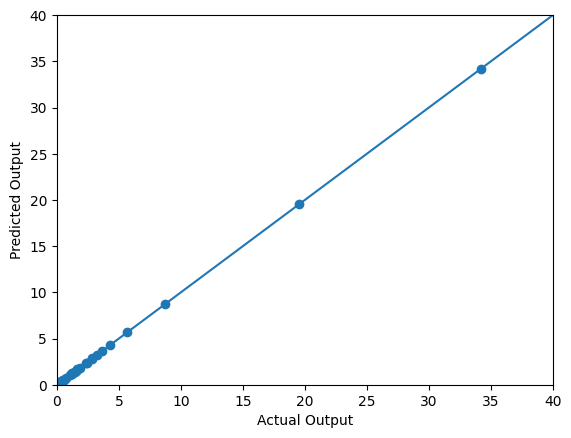

[0.14400005340576172, 0.3340001106262207, 0.4519999027252197, 0.33300018310546875, 0.38299989700317383, 0.3660001754760742, 0.5440001487731934, 0.43600010871887207, 1.159999966621399, 2.4000000953674316, 1.9000000953674316, 1.2000000476837158, 3.259999990463257, 2.799999952316284, 5.690000057220459, 0.059999942779541016, 0.09999990463256836, 2.8400001525878906, 8.720000267028809, 1.440000057220459, 4.269999980926514, 1.5500000715255737, 1.6399999856948853, 0.3600001335144043, 1.6500000953674316, 19.5, 1.0600001811981201, 2.3299999237060547, 1.2300000190734863, 0.7200000286102295, 3.630000114440918, 1.2000000476837158, 0.49000000953674316, 0.6400001049041748, 34.20000076293945]
[[0.1496129035949707], [0.3368704319000244], [0.4605398178100586], [0.33660149574279785], [0.3879575729370117], [0.370774507522583], [0.548720121383667], [0.43715453147888184], [1.1709764003753662], [2.352297067642212], [1.859511375427246], [1.2337583303451538], [3.2345004081726074], [2.788564920425415], [5.68308

In [76]:
graph(model,X,y,0,40)